**Importing libraries**

In [1]:
from google.colab import drive  
import os
import numpy as np
import pandas as pd
import gc
import json
from collections import Counter, defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import re
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.tokenize import RegexpTokenizer
from gensim.models import Phrases
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from google.colab import files
import math
import nltk
nltk.download('punkt')
from gensim.models.phrases import Phrases
from gensim.models.phrases import *
from sklearn.cluster import SpectralClustering
from nltk import everygrams
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from nltk.cluster import KMeansClusterer 
from sklearn import cluster
from sklearn import metrics
import pickle
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Connect to google drive**

In [2]:
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/kaggle_dataset'

In [ ]:
%cd /content/gdrive/My Drive/kaggle_dataset

/content/gdrive/My Drive/kaggle_dataset


**Download arxiv dataset from kaggle**

In [ ]:
!kaggle datasets download -d Cornell-University/arxiv

 99% 969M/978M [00:09<00:00, 95.1MB/s]
100% 978M/978M [00:09<00:00, 108MB/s] 


In [ ]:
!mkdir arxiv
!mv arxiv.zip arxiv

mkdir: cannot create directory ‘arxiv’: File exists


In [ ]:
%cd arxiv/

/content/gdrive/My Drive/kaggle_dataset/arxiv


In [ ]:
!unzip arxiv.zip

Archive:  arxiv.zip
replace arxiv-metadata-oai-snapshot.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Get arxiv metadata**

In [ ]:
def get_metadata():
    with open('arxiv-metadata-oai-snapshot.json') as f:
        for line in f:
            yield line

In [ ]:
metadata = get_metadata()

for paper in metadata:
    first_paper = json.loads(paper)
    break

In [ ]:
for key in first_paper:
    print(key)

id
submitter
authors
title
comments
journal-ref
doi
report-no
categories
license
abstract
versions
update_date
authors_parsed


In [ ]:
categories = []
abstract_set = set()
indices_to_delete = []
metadata = get_metadata()
total_items = 0

for ind, paper in tqdm(enumerate(metadata)):
    paper = json.loads(paper)
    total_items += 1
    categories.append(paper['categories'])
    if paper['abstract'] not in abstract_set:
        abstract_set.add(paper['abstract'])         
    else:
        indices_to_delete.append(ind) 
   

print(f'Total number of items is: {total_items}')



Total number of items is: 1893925



**Extract CS only categories**

In [ ]:
categories_list=[]

for category in categories:
  categories_list.extend(category.split())
  


In [ ]:
categories_list = list(dict.fromkeys(categories_list))
print (categories_list)
print(len(categories_list))

['hep-ph', 'math.CO', 'cs.CG', 'physics.gen-ph', 'math.CA', 'math.FA', 'cond-mat.mes-hall', 'gr-qc', 'cond-mat.mtrl-sci', 'astro-ph', 'math.NT', 'math.AG', 'math.AT', 'hep-th', 'math.PR', 'hep-ex', 'nlin.PS', 'physics.chem-ph', 'q-bio.MN', 'math.NA', 'cond-mat.str-el', 'cond-mat.stat-mech', 'math.RA', 'physics.optics', 'physics.comp-ph', 'q-bio.PE', 'q-bio.CB', 'quant-ph', 'q-bio.QM', 'hep-lat', 'nucl-th', 'math.OA', 'math.QA', 'math-ph', 'math.MP', 'nlin.CD', 'physics.plasm-ph', 'physics.space-ph', 'nlin.SI', 'cs.IT', 'math.IT', 'cs.NE', 'cs.AI', 'physics.ed-ph', 'math.DG', 'cond-mat.soft', 'physics.pop-ph', 'cs.DS', 'math.CV', 'math.DS', 'physics.soc-ph', 'nucl-ex', 'math.RT', 'cond-mat.other', 'physics.flu-dyn', 'physics.data-an', 'cs.CE', 'cs.MS', 'cs.NA', 'math.GR', 'cond-mat.supr-con', 'math.AC', 'math.SG', 'cs.CC', 'math.KT', 'math.GT', 'math.AP', 'physics.class-ph', 'q-bio.OT', 'physics.bio-ph', 'q-bio.BM', 'nlin.CG', 'cs.DM', 'cs.LO', 'cond-mat.dis-nn', 'math.MG', 'physics.ato

In [ ]:
prefix = 'cs.'
for word in categories_list[:]:
    if not word.startswith(prefix):
        categories_list.remove(word)
print (categories_list)
print (len(categories_list))

['cs.CG', 'cs.IT', 'cs.NE', 'cs.AI', 'cs.DS', 'cs.CE', 'cs.MS', 'cs.NA', 'cs.CC', 'cs.DM', 'cs.LO', 'cs.CR', 'cs.NI', 'cs.LG', 'cs.PF', 'cs.SE', 'cs.AR', 'cs.SC', 'cs.CY', 'cs.IR', 'cs.CV', 'cs.OH', 'cs.DB', 'cs.DL', 'cs.HC', 'cs.PL', 'cs.GT', 'cs.DC', 'cs.MA', 'cs.CL', 'cs.MM', 'cs.RO', 'cs.ET', 'cs.GL', 'cs.FL', 'cs.OS', 'cs.SD', 'cs.GR', 'cs.SY', 'cs.SI']
40




*   **Remove duplicate papers**
*   **Get papers in computer science field**
*   **Get papers in journals only**




In [ ]:
titles = []
abstracts = []
ids = []
years = []
paper_categories = []
journals = []
journal1=''
ind= 0
metadata = get_metadata()
for paper in tqdm(metadata):
    if ind not in indices_to_delete:
      paper_dict = json.loads(paper)
      if ind ==1:
        journal1 = paper_dict.get('journal-ref')
      categories = paper_dict.get('categories').split()
      categories = list(dict.fromkeys(categories))
      try:
        year = int(paper_dict.get('id')[0:2]) 
        journal = paper_dict.get('journal-ref')
        if any(item in categories for item in categories_list) and year >=17 and year <=18 and journal != journal1:
          years.append(paper_dict.get('id')[0:4])
          ids.append(paper_dict.get('id'))
          paper_categories.append(paper_dict.get('categories'))
          titles.append(paper_dict.get('title'))
          abstracts.append(paper_dict.get('abstract').replace("\n"," "))
          journals.append(paper_dict.get('journal-ref'))
      except:
          pass 
    ind = ind +1
print (len(years))
print (len(ids))
print (len(titles))
print (len(abstracts))
print (len(paper_categories))
print (len(journals))





345068
345068
345068
345068
345068
345068


In [ ]:
d = {'id':ids,'title':titles,'abstract':abstracts,'categories':paper_categories, 'year':years}
arxiv = pd.DataFrame(d)
arxiv

,id,title,abstract,categories,year
0,0704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,0704
1,0704.0046,A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldma...",quant-ph cs.IT math.IT,0704
2,0704.0047,Intelligent location of simultaneously active ...,The intelligent acoustic emission locator is...,cs.NE cs.AI,0704
3,0704.0050,Intelligent location of simultaneously active ...,Part I describes an intelligent acoustic emi...,cs.NE cs.AI,0704
4,0704.0062,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS,0704
...,...,...,...,...,...
345063,2106.02030,Formally Verified Next-Generation Airborne Col...,The design of aircraft collision avoidance a...,cs.LO cs.GT cs.SY eess.SY,2106
345064,2106.02034,DynamicViT: Efficient Vision Transformers with...,Attention is sparse in vision transformers. ...,cs.CV cs.AI cs.LG,2106
345065,2106.02036,Anticipative Video Transformer,We propose Anticipative Video Transformer (A...,cs.CV cs.AI cs.LG cs.MM,2106
345066,2106.02039,Reinforcement Learning as One Big Sequence Mod...,Reinforcement learning (RL) is typically con...,cs.LG cs.AI,2106


**Segment into months**

In [ ]:
def segment_into_months(start_year, end_year, months, data):

  data["year"] = pd.to_numeric(data["year"])
  time_frames = []
  time_in_months = (end_year - start_year + 2 )*12
  prev_z = int(str(start_year) + '01')
  break_loop=False

  for x in range(1, time_in_months+1, months):
    segment=[]
    v=(x+months)//12
    a= (x+months)%12
    digits = int(math.log10(a))+1
    if start_year + v > end_year:
      z = int(str(start_year+v) +'00')
      break_loop=True
    elif digits==1 :
      z = int(str(start_year+v) + '0' + str(a))
    else:
      z = int(str(start_year+v) + str(a))
    segment = data[(data.year < z) & (data.year >= prev_z)]
    prev_z=z
    time_frames.append(segment)
    if break_loop:
      break
  return time_frames


  

In [ ]:
arxiv_segments=segment_into_months(17, 18, 6, arxiv)
for n in range(len(arxiv_segments)):
  print(len(arxiv_segments[n]))

1888
2136
2696
3069


**Calculating TF-IDF**

Getting terms that appear in more than 5% of the papers to remove from keywords if detected

In [ ]:
cvec = CountVectorizer(list(arxiv_segments[0]['abstract']),max_df=0.05,ngram_range=(1,3))

In [ ]:
word_count_vector = cvec.fit_transform(arxiv['abstract'].tolist())

In [ ]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(word_count_vector)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df = weights_df.sort_values(by='weight', ascending=False)

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

Print list of stopwords

In [ ]:
stopwords_list = stopwords.words('english')

**Fine tuning Word2vec model**

In [3]:
%cd /content/gdrive/My Drive/word2vec_dataset


/content/gdrive/My Drive/word2vec_dataset


**Downloading pretrained word2vec model from kaggle**

In [ ]:
!kaggle datasets download -d shanth84/word2vec-google


In [ ]:
!unzip word2vec-google.zip

**Tokenizing corpus sentences using NLTK**

In [ ]:
all_sentences = []

for i in range (len(arxiv['abstract'].tolist())):
  sentences = nltk.sent_tokenize(arxiv['abstract'].iloc[i])
  all_sentences = all_sentences+ sentences
  print((i/len(arxiv['abstract'].tolist()))*100)

tokenizer = RegexpTokenizer(r'\w+')
sentences_tokenized = [w.lower() for w in all_sentences]
sentences_tokenized = [tokenizer.tokenize(i) for i in sentences_tokenized]

**Save tokenized sentences using pickle**

In [ ]:
with open ('/content/gdrive/My Drive/word2vec_dataset/sentences.pkl','wb') as file:
  pickle.dump(sentences_tokenized, file)

**Load tokenized sentences to train word2vec model**

In [ ]:
with open ('/content/gdrive/My Drive/word2vec_dataset/sentences.pkl','rb') as file:
  sentences_tokenized = pickle.load(file)

In [ ]:
len(sentences_tokenized)

2400577

**Get bigrams and trigrams of tokenized sentences**

In [ ]:
bigrams = Phrases(sentences_tokenized, min_count=1, threshold=1)

In [ ]:
trigrams = Phrases(bigrams[sentences_tokenized], min_count=1)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



**Train model**

In [ ]:
model = Word2Vec(size=300, min_count=1)
model.build_vocab(trigrams[bigrams[sentences_tokenized]], keep_raw_vocab=False,  progress_per=10000)
total_examples = model.corpus_count
model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin', binary =True, lockf=1.0)
model.train(trigrams[bigrams[sentences_tokenized]], total_examples=total_examples, epochs=5 )

**Save model**

In [ ]:
model.wv.save_word2vec_format('word2vec_format.model')
model.save('word2vec.model')

**Load fine tuned word2vec model**

In [4]:
model = Word2Vec.load('word2vec.model')

**YAKE! KEYWORD EXTRACTION**

In [ ]:
! pip install git+https://github.com/LIAAD/yake

In [ ]:
import yake
language = "en"
max_ngram_size = 4
deduplication_thresold = 0.4
deduplication_algo = 'seqm'
windowSize = 2
numOfKeywords = 15
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None )
keywords = custom_kw_extractor.extract_keywords( arxiv['abstract'].iloc[0])
for kw in keywords:
  print (kw)

In [ ]:
def extract_keywords (data):
  all_keywords= []
  language = "en"
  max_ngram_size = 3
  deduplication_thresold = 0.4
  deduplication_algo = 'seqm'
  windowSize = 2
  numOfKeywords = 15
  for x in range (0, len(data['abstract'])):
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None )
    keywords = custom_kw_extractor.extract_keywords( data['abstract'].iloc[x])
    all_keywords= all_keywords + keywords
    print("Paper number %s from %s" % (x, len(data['abstract'])))
  return all_keywords


*   **Get seperate keywords for each segment of time**
*   **Save an download each segment to csv for future use**




In [ ]:
keywords_segments=[]

keywords_segments.append(extract_keywords(arxiv_segments[0]))

In [ ]:
keywords_segments[0].sort(key=lambda x:x[1])
filtered_keywords=[]
for item in keywords_segments[0] :
  if item[1] <0.13 :
    filtered_keywords.append (item)
  else:
    break
df = pd.DataFrame(keywords_segments[0], columns =['Topic', 'Score'])
df.to_csv('keywords0.csv') 
files.download('keywords0.csv')

In [12]:
df = pd.read_csv("years.csv")
keywords = df['keyword'].tolist()
keywords_set = set(keywords)
word_embeddings = []
word_embeddings_set = []
years = df['year'].tolist()




*   Convert keywords to lower case
*   Replace space with undersore
*   Get keywords with word2vec representations






In [6]:
final_keywords_set=[]
final_keywords=[]
out_of_vocab=[]
for keyword in keywords_set:
  try:
    keyword=keyword.lower()
    keyword=keyword.replace(" ","_")
    keyword=keyword.replace("-","_")
  except:
    continue
  try:
    word_embeddings_set.append(model.wv[keyword])
    final_keywords.append(keyword)

  except KeyError as e:
    out_of_vocab.append(keyword)
out_of_vocab = list(set(out_of_vocab))

In [13]:
final_keywords_set=[]
final_keywords=[]
for keyword in keywords_set:
    word_embeddings_set.append(model.wv[keyword])
    final_keywords_set.append(keyword)

for keyword in keywords:
    word_embeddings.append(model.wv[keyword])
    final_keywords.append(keyword)

In [14]:
print("keywords: %s" % len(final_keywords_set))
print("word embeddings: %s" % len(word_embeddings_set))


keywords: 5108
word embeddings: 5108


In [15]:
print("keywords: %s" % len(final_keywords))
print("word embeddings: %s" % len(word_embeddings))



keywords: 10922
word embeddings: 10922


**Dataframe of keywords and their corresponding word2vec embedding**

In [16]:
d = {'keyword':final_keywords_set,'embedding':word_embeddings_set}
keyword_embeddings_set = pd.DataFrame(d)
keyword_embeddings_set

,keyword,embedding
0,rdf,"[0.27719456, 0.07223707, 0.035677336, 0.807350..."
1,citation_index,"[0.09991628, 0.11180088, 0.056897413, 0.091021..."
2,binary_decision_diagram,"[0.014247088, 0.0017550079, 0.024763364, 0.078..."
3,cyber_physical_systems,"[-0.49986193, -0.07701981, 0.06464398, 0.27989..."
4,multimodal_user_interface,"[0.0046232766, 0.012085488, -0.020040289, -0.0..."
...,...,...
5103,dda,"[0.09778577, -0.011959932, 0.10974377, 0.11432..."
5104,cbmir_systems,"[0.0061768033, -0.0092355255, 0.024744052, 0.0..."
5105,requirements_specification,"[-0.060267903, -0.0014637075, -0.050964966, 0...."
5106,shortest_path_tree_rooted,"[-0.04695962, 0.048324585, 0.06275925, 0.08716..."


In [17]:
d = {'keyword':final_keywords,'embedding':word_embeddings, 'year':years}
keyword_embeddings = pd.DataFrame(d)
keyword_embeddings

,keyword,embedding,year
0,aaronson,"[0.078780815, 0.01660339, 0.11974201, 0.249648...",1706
1,aaronson_and_arkhipov,"[0.027889142, 0.013643143, 0.017315153, 0.0791...",1706
2,abc,"[-0.47159314, -0.18222667, -0.049064122, 0.425...",1706
3,abc_index,"[0.06813092, 0.01122095, 0.039759718, 0.042845...",1706
4,abelian,"[0.13789047, -0.0039616036, 0.28872997, 0.3361...",1706
...,...,...,...
10917,xss_vulnerabilities,"[0.036885064, -0.014309848, 0.003318258, 0.051...",1812
10918,xyzmn,"[-0.010648966, -0.0133874165, -0.0060359724, 0...",1812
10919,zero_shot_learning,"[0.24736777, 0.9374075, 0.1263554, 0.2965303, ...",1812
10920,zero_shot_learning,"[0.24736777, 0.9374075, 0.1263554, 0.2965303, ...",1812


**Clustering**

In [18]:
x=np.array(keyword_embeddings_set['embedding'].tolist())

In [19]:
normalized_x = x/np.linalg.norm(x)
print(normalized_x)

[[ 7.5447478e-04  1.9661657e-04  9.7107426e-05 ... -8.2061870e-04
  -4.5263889e-05  2.6076578e-04]
 [ 2.7195452e-04  3.0430232e-04  1.5486474e-04 ... -2.0758633e-04
  -7.6626522e-05 -2.5816695e-05]
 [ 3.8778064e-05  4.7768226e-06  6.7401517e-05 ... -6.0428309e-05
  -1.9166886e-05  3.1872827e-05]
 ...
 [-1.6403862e-04 -3.9839542e-06 -1.3871766e-04 ... -3.3814265e-04
   6.7300811e-05  1.2756178e-04]
 [-1.2781582e-04  1.3153101e-04  1.7081962e-04 ...  1.6020675e-04
   1.5089920e-04  1.7309518e-04]
 [-2.6736036e-04  1.2550361e-03 -6.0875405e-04 ...  2.9253858e-04
   3.0948195e-04  2.6369398e-04]]


In [20]:
def get_top_words(index2word, k, centers, wordvecs):
  tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
  closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
  closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
  closest_words = {};
  for i in range(0, len(closest_words_idxs)):
    closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
  df = pd.DataFrame(closest_words);
  df.index = df.index+1
  return df;

In [591]:
def display_cloud(cluster_num, cmap):
    print('Cluster #' + str(cluster_num))
    wc = WordCloud(background_color="black", max_words=50, max_font_size=100, colormap=cmap, width=1500, height=1200, min_font_size=20);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('agg_cluster_' + str(cluster_num), bbox_inches='tight')

In [354]:
%cd /content/gdrive/My Drive/clusters

/content/gdrive/My Drive/clusters


Hierarchial Clustering

In [586]:
cluster_agg = AgglomerativeClustering(n_clusters=None, linkage='ward', compute_full_tree=True, distance_threshold=0.085)
cluster_array=cluster_agg.fit_predict(normalized_x)

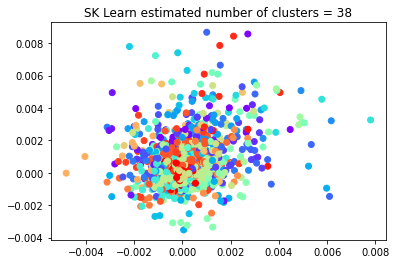

In [587]:
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(cluster_agg.labels_)}")
plt.scatter(normalized_x[:,0], normalized_x[:,1], c=cluster_agg.labels_, cmap='rainbow')

In [588]:
silhouette_score = metrics.silhouette_score(normalized_x, cluster_agg.labels_)
 
print ("Silhouette_score: ")
print (silhouette_score)


Silhouette_score: 
0.17667988


In [589]:
y_predict = cluster_agg.fit_predict(normalized_x)
clf = NearestCentroid()
clf.fit(normalized_x, y_predict)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [607]:
top_words = get_top_words(keyword_embeddings_set['keyword'], 16, clf.centroids_, normalized_x);

Cluster #13


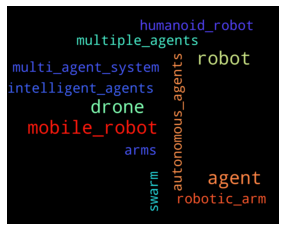

In [608]:
cmaps = cycle(['rainbow'])
for i in range(1):
    col = next(cmaps);
    display_cloud(13, col)

In [590]:
for i in range (38):
  length=0
  print('cluster: %s' %i)
  for j in range (len(cluster_agg.labels_)):
     if cluster_agg.labels_[j] == i:
       length+=1
  print(length)



cluster: 0
22
cluster: 1
17
cluster: 2
11
cluster: 3
85
cluster: 4
63
cluster: 5
17
cluster: 6
59
cluster: 7
5
cluster: 8
55
cluster: 9
20
cluster: 10
20
cluster: 11
14
cluster: 12
8
cluster: 13
4
cluster: 14
290
cluster: 15
2
cluster: 16
8
cluster: 17
8
cluster: 18
11
cluster: 19
65
cluster: 20
2
cluster: 21
4
cluster: 22
71
cluster: 23
551
cluster: 24
40
cluster: 25
2374
cluster: 26
3
cluster: 27
17
cluster: 28
13
cluster: 29
2
cluster: 30
26
cluster: 31
20
cluster: 32
4
cluster: 33
375
cluster: 34
70
cluster: 35
8
cluster: 36
4
cluster: 37
740


In [480]:
clusters_array=[]
for i in range(38):
  len_1706=0
  len_1712=0
  len_1806=0
  len_1812=0
  for j in range(len(cluster_agg.labels_)):
    if cluster_agg.labels_[j] == i:
      keyword = keyword_embeddings_set['keyword'][j]
      for k in range (len(keyword_embeddings['keyword'].tolist())):
        if keyword == keyword_embeddings['keyword'][k]:
          if keyword_embeddings['year'][k]==1706:
            len_1706+=1
          elif keyword_embeddings['year'][k]==1712:
            len_1712+=1
          elif keyword_embeddings['year'][k]==1806:
            len_1806+=1
          elif keyword_embeddings['year'][k]==1812:
            len_1812+=1
  cluster={'len_1706':len_1706,'len_1712':len_1712,'len_1806':len_1806,'len_1812':len_1812}
  clusters_array.append(cluster)


            


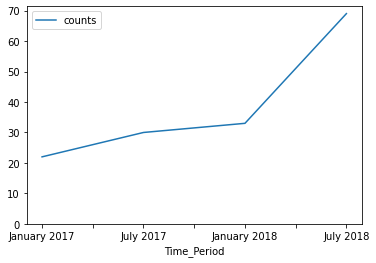

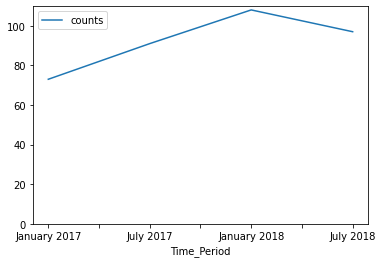

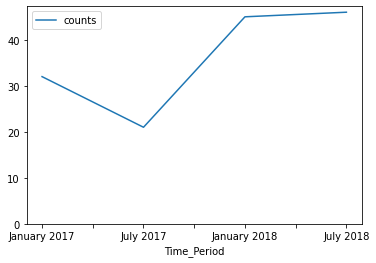

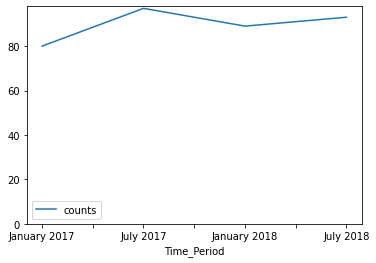

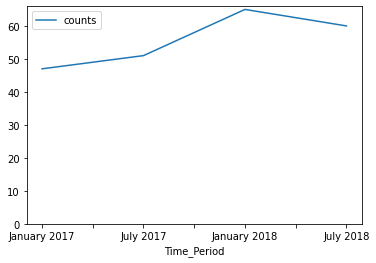

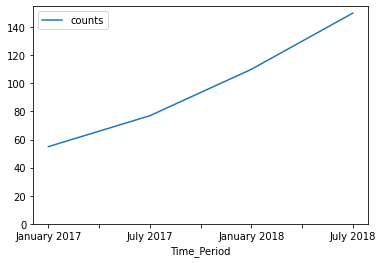

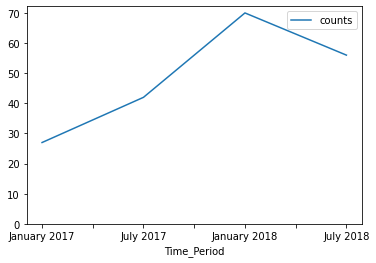

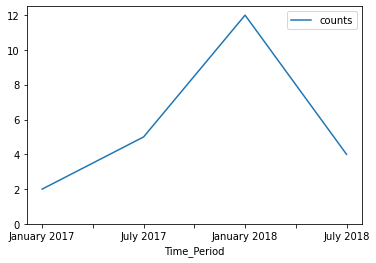

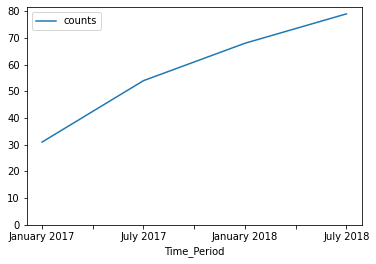

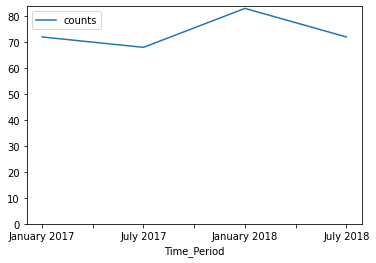

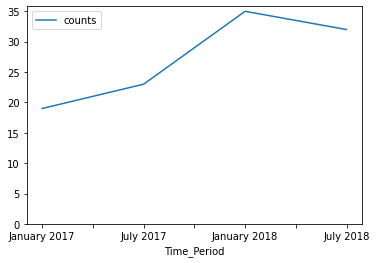

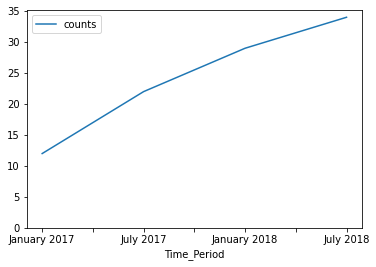

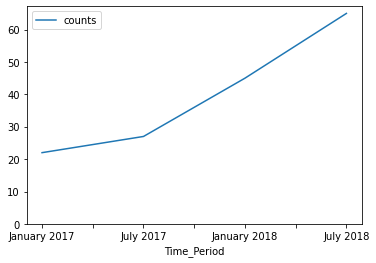

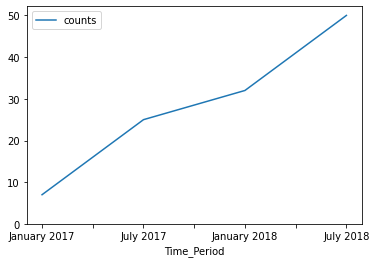

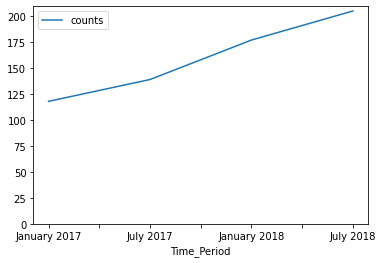

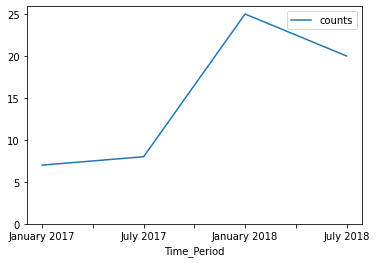

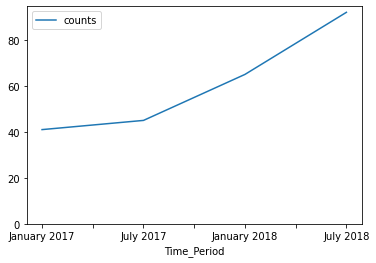

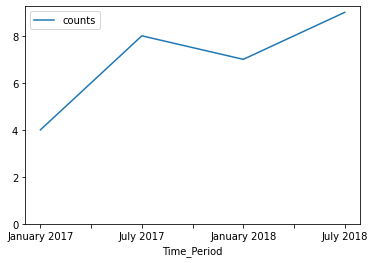

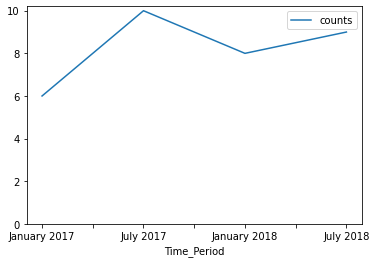

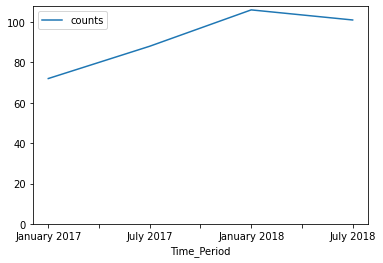

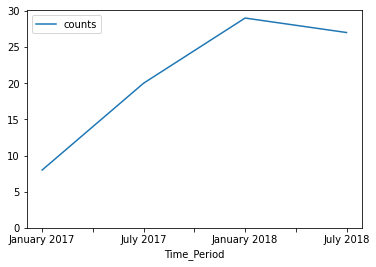

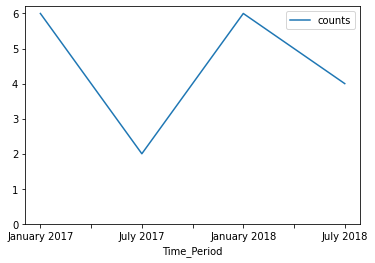

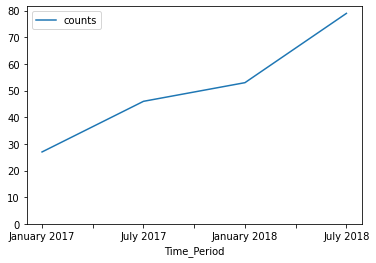

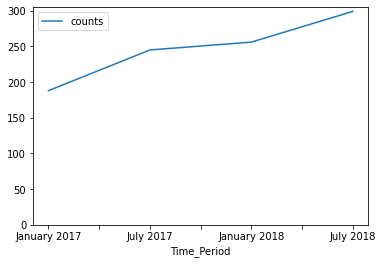

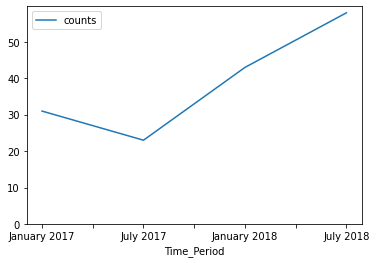

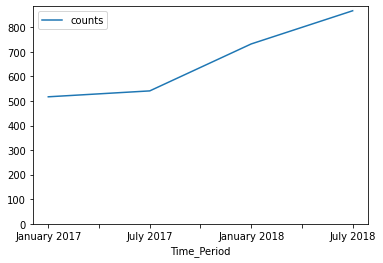

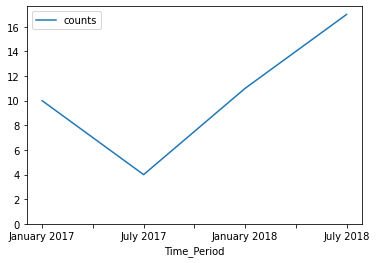

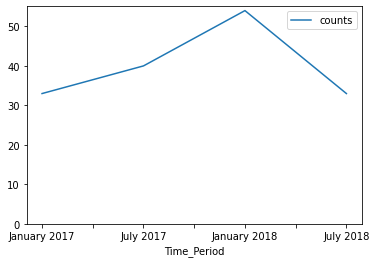

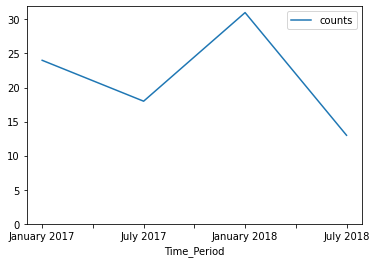

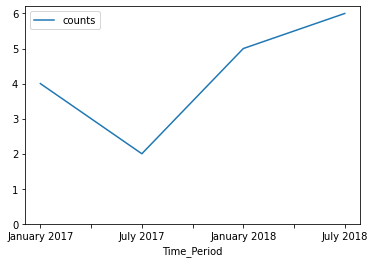

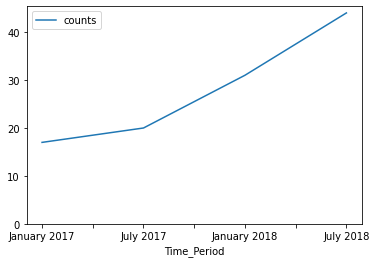

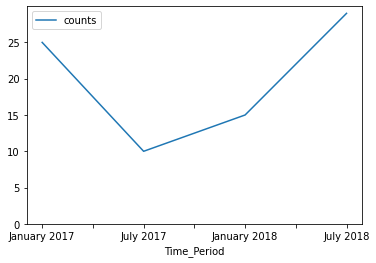

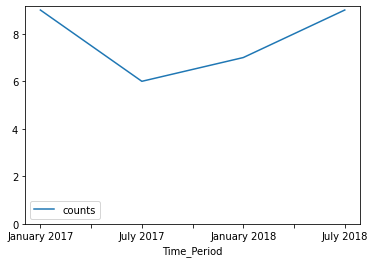

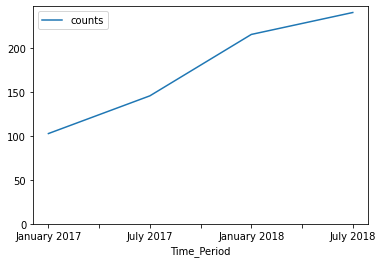

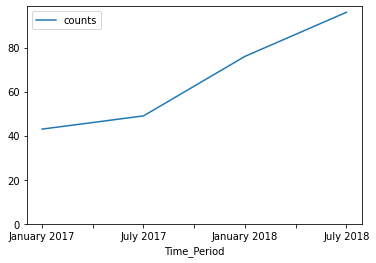

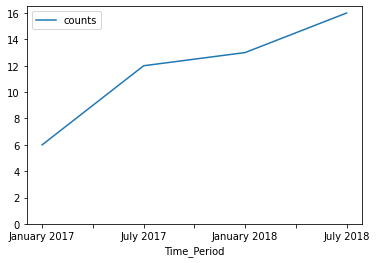

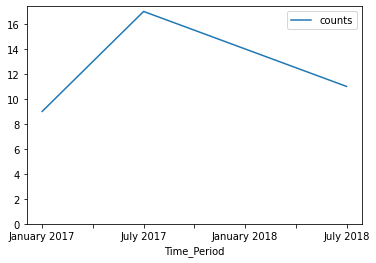

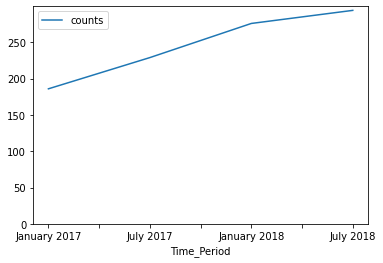

In [482]:
for i in range (38):
  cluster_num = i
  cluster_counts=clusters_array[cluster_num]
  cluster = {
      "counts": [cluster_counts['len_1706'], cluster_counts['len_1712'], cluster_counts['len_1806'],cluster_counts['len_1812']],
      "Time_Period": ['January 2017', 'July 2017', 'January 2018', 'July 2018']
  }
    
  df = pd.DataFrame(cluster)  
  # to plot the graph
  df.plot(x="Time_Period", y="counts", kind='line')
  plt.ylim(ymin=0)
  plt.show()


K means

In [ ]:
from sklearn.cluster import KMeans
a=[]
K=range(1,250)
for i in K:
    kmean=KMeans(n_clusters=i,  init='k-means++')
    kmean.fit(x)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [ ]:
!pip install kneed
from kneed import KneeLocator

In [ ]:

kl = KneeLocator(
     range(1, 250), a, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

30

In [483]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [484]:
centers, clusters = clustering_on_wordvecs(normalized_x, 30);
centroid_map = dict(zip(keyword_embeddings_set['keyword'], clusters));

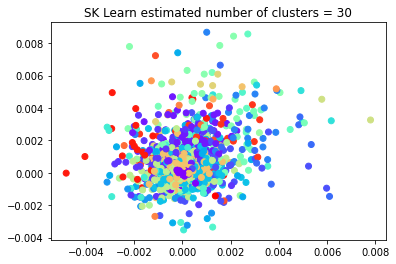

In [485]:
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(clusters)}")
plt.scatter(normalized_x[:,0], normalized_x[:,1], c=clusters, cmap='rainbow')

In [500]:
for i in range (30):
  length=0
  print('cluster: %s' %i)
  for j in range (len(clusters)):
     if clusters[j] == i:
       length+=1
  print(length)


cluster: 0
2604
cluster: 1
148
cluster: 2
112
cluster: 3
85
cluster: 4
11
cluster: 5
31
cluster: 6
34
cluster: 7
47
cluster: 8
291
cluster: 9
2
cluster: 10
3
cluster: 11
33
cluster: 12
14
cluster: 13
6
cluster: 14
47
cluster: 15
25
cluster: 16
25
cluster: 17
9
cluster: 18
340
cluster: 19
2
cluster: 20
8
cluster: 21
1153
cluster: 22
2
cluster: 23
2
cluster: 24
4
cluster: 25
3
cluster: 26
8
cluster: 27
23
cluster: 28
34
cluster: 29
2


In [580]:
top_words = get_top_words(keyword_embeddings_set['keyword'], 15, centers, normalized_x);


Cluster #29


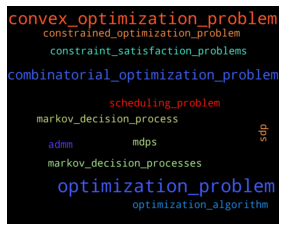

In [581]:
cmaps = cycle(['rainbow'])
for i in range(1):
    col = next(cmaps);
    display_cloud(29, col)

In [582]:
silhouette_score = metrics.silhouette_score(normalized_x, clusters)
 
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.25830877


In [99]:
for i in range (30):
  length=0
  print('cluster: %s' %i)
  for j in range (len(clusters)):
     if clusters[j] == i:
       length+=1
  print(length)



cluster: 0
2568
cluster: 1
44
cluster: 2
341
cluster: 3
67
cluster: 4
3
cluster: 5
1141
cluster: 6
29
cluster: 7
41
cluster: 8
8
cluster: 9
30
cluster: 10
215
cluster: 11
14
cluster: 12
9
cluster: 13
8
cluster: 14
28
cluster: 15
2
cluster: 16
45
cluster: 17
4
cluster: 18
26
cluster: 19
54
cluster: 20
3
cluster: 21
10
cluster: 22
6
cluster: 23
19
cluster: 24
68
cluster: 25
33
cluster: 26
2
cluster: 27
2
cluster: 28
256
cluster: 29
32


In [ ]:
clusters_array=[]
for i in range(cluster_num):
  len_1706=0
  len_1712=0
  len_1806=0
  len_1812=0
  for j in range(len(clusters)):
    if clusters[j] == i:
      keyword = keyword_embeddings_set['keyword'][j]
      for k in range (len(keyword_embeddings['keyword'].tolist())):
        if keyword == keyword_embeddings['keyword'][k]:
          if keyword_embeddings['year'][k]==1706:
            len_1706+=1
          elif keyword_embeddings['year'][k]==1712:
            len_1712+=1
          elif keyword_embeddings['year'][k]==1806:
            len_1806+=1
          elif keyword_embeddings['year'][k]==1812:
            len_1812+=1
  cluster={'len_1706':len_1706,'len_1712':len_1712,'len_1806':len_1806,'len_1812':len_1812}
  clusters_array.append(cluster)
            


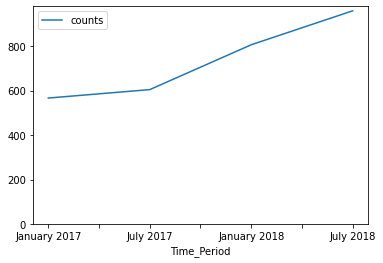

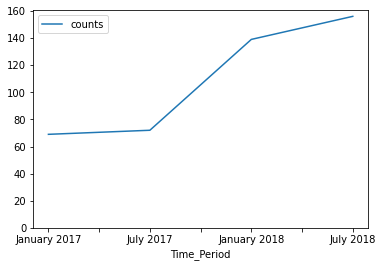

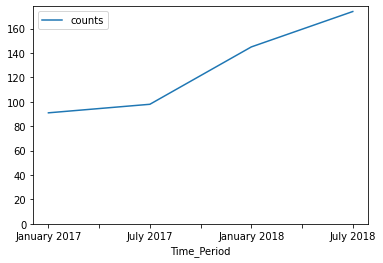

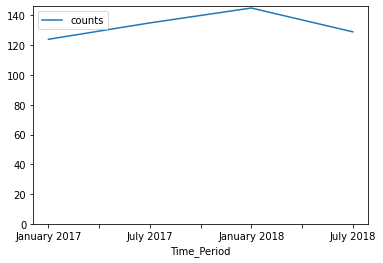

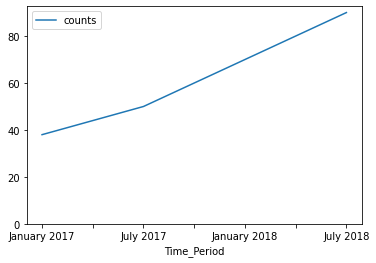

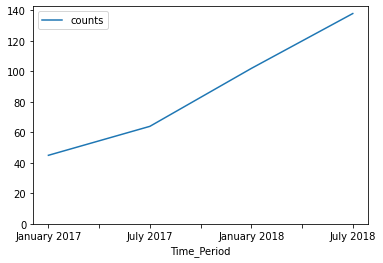

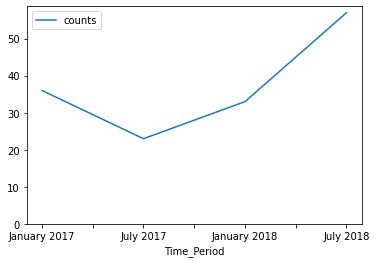

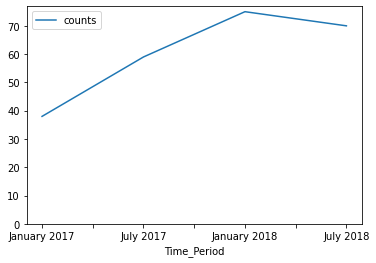

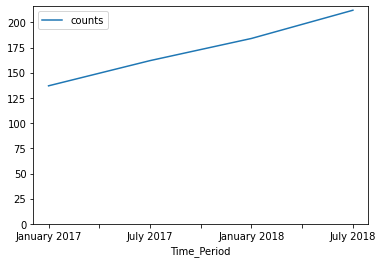

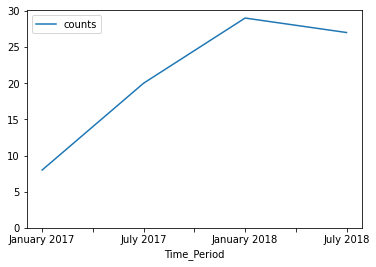

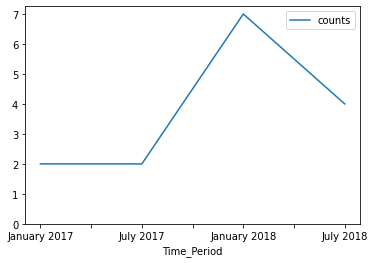

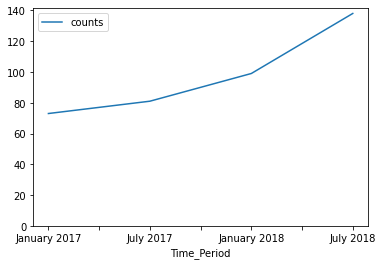

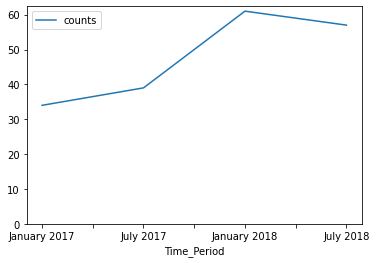

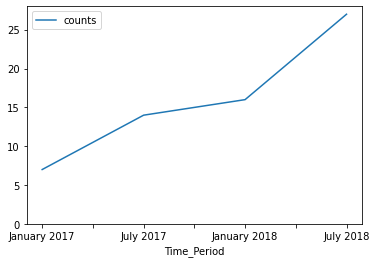

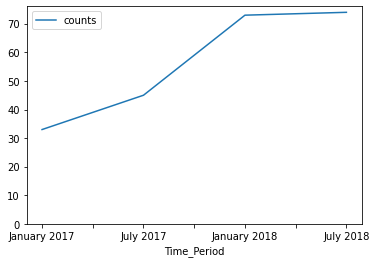

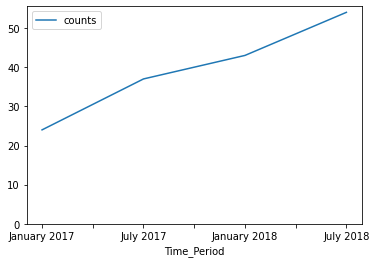

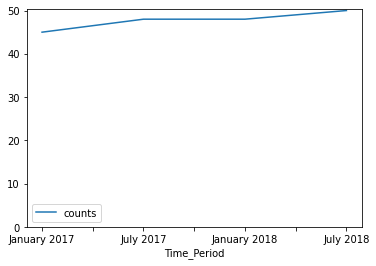

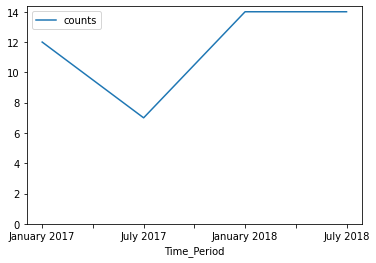

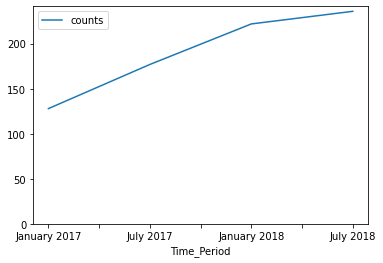

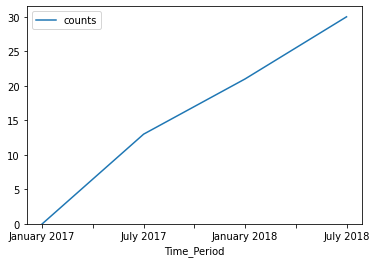

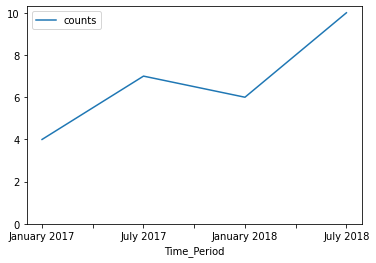

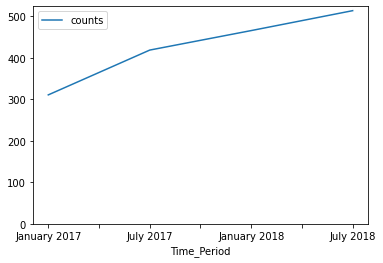

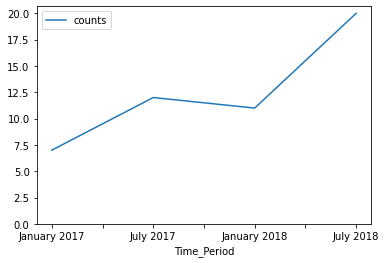

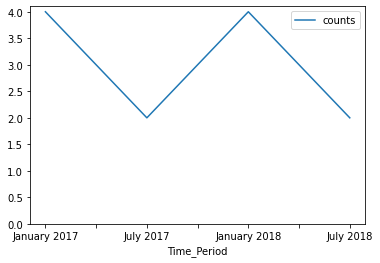

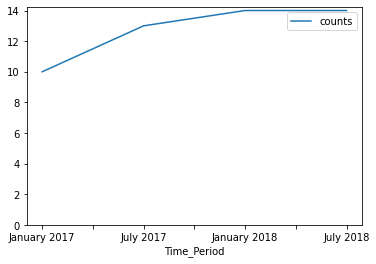

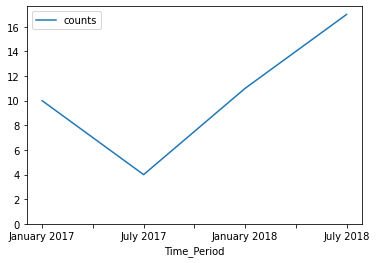

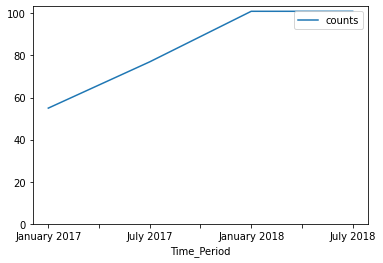

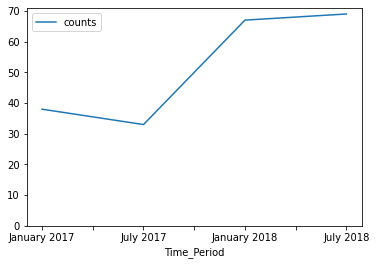

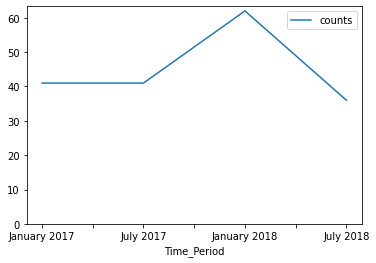

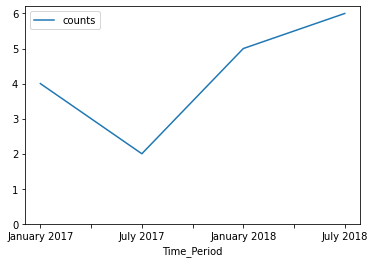

In [585]:
for i in range (30):
  cluster_num = i
  cluster_counts=clusters_array[cluster_num]
  cluster = {
      "counts": [cluster_counts['len_1706'], cluster_counts['len_1712'], cluster_counts['len_1806'],cluster_counts['len_1812']],
      "Time_Period": ['January 2017', 'July 2017', 'January 2018', 'July 2018']
  }
    
  df = pd.DataFrame(cluster)  
  # to plot the graph
  df.plot(x="Time_Period", y="counts", kind='line')
  plt.ylim(ymin=0)
  plt.show()


In [ ]:
from sklearn.manifold import TSNE

def tsne_plot():

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(X_principal)

    x1 = []
    y1 = []
    for value in new_values:
        x1.append(value[0])
        y1.append(value[1])
        
    plt.figure(figsize=(16, 10)) 
    for i in range(len(x1)):
        plt.scatter(x1[i],y1[i])
       
    plt.show()

In [ ]:
tsne_plot()
